# 分类-Classification

*Supervised* machine learning techniques involve training a model to operate on a set of *features* and predict a *label* using a dataset that includes some already-known label values. You can think of this function like this, in which ***y*** represents the label we want to predict and ***X*** represents the vector of features the model uses to predict it.

监督学习技术包括训练模型对一组 *特征* 进行操作，并使用包含一些已知标签值的数据集预测 *标签*。你可以这样想这个函数，***y***表示我们想要预测的标签，***X***表示模型用于预测的特征向量。

$$y = f([x_1, x_2, x_3, ...])$$


*Classification* is a form of supervised machine learning in which you train a model to use the features (the ***x*** values in our function) to predict a label (***y***) that calculates the probability of the observed case belonging to each of a number of possible classes, and predicting an appropriate label. The simplest form of classification is *binary* classification, in which the label is 0 or 1, representing one of two classes; for example, "True" or "False"; "Internal" or "External"; "Profitable" or "Non-Profitable"; and so on. 

*分类* 是监督机器学习的一种形式，您可以训练模型使用特征(我们函数中的***x***值) 预测标签(***y***) ，计算属于多个可能类别的观察案例的概率，并预测适当的标签。最简单的分类形式是*二进制*分类，其中标签为0或1，表示两个类别中的一个；例如，“真”或“假”“内部”或“外部”“有利可图”或“无利可图”；等等


## 二分类-Binary Classification

In this notebook, we will focus on an example of *binary classification*, where the model must predict a label that belongs to one of two classes. In this exercise, we'll train a binary classifier to predict whether or not a patient should be tested for diabetes based on some medical data.

在本笔记本中，我们将关注一个*二分类*的示例，其中模型必须预测属于两个类之一的标签。在本练习中，我们将训练一个二元分类器，根据一些医学数据预测患者是否应该接受糖尿病检测。



### 获取及预处理数据-Explore the data

Run the following cell to load a CSV file of patent data into a **Pandas** dataframe:

运行以下单元格将专利数据的CSV文件加载到一个 DataFrame 中：

> **Citation**: The diabetes dataset used in this exercise is based on data originally collected by the National Institute of Diabetes and Digestive and Kidney Diseases. 

>**注**：本研究中使用的糖尿病数据集基于国家糖尿病、消化和肾脏疾病研究所最初收集的数据。

In [1]:
import pandas as pd

# load the training dataset
# 由于下面这句是 Linux 下的下载命令, 所以在 Windows 上跑的时候直接下载了对应文件放在本笔记的同级目录下了
# !wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


This data consists of diagnostic information about some patients who have been tested for diabetes. Scroll to the right if necessary, and note that the final column in the dataset (**Diabetic**) contains the value ***0*** for patients who tested negative for diabetes, and ***1*** for patients who tested positive. This is the label that we will train our model to predict; most of the other columns (**Pregnancies**,**PlasmaGlucose**,**DiastolicBloodPressure**, and so on) are the features we will use to predict the **Diabetic** label.

这些数据包括一些糖尿病患者的诊断信息。如有必要，请向右滚动，注意数据集(**Diabetic**) 的最后一列包含值***0***用于糖尿病检测阴性的患者，以及***1***用于检测阳性的患者。这是我们将训练模型预测的标签；大多数其他列(**怀孕**、**血浆葡萄糖**、**舒张压**，等等) 是我们将用于预测**糖尿病**标签的特征。

Let's separate the features from the labels - we'll call the features ***X*** and the label ***y***:

让我们将特征与标签分开-我们将特征称为***X***, 将标签称为***y***：

In [2]:
# Separate features and labels
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label = 'Diabetic'
X, y = diabetes[features].values, diabetes[label].values

for n in range(0,4):
    print("Patient", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Patient 1 
  Features: [0.0, 171.0, 80.0, 34.0, 23.0, 43.50972593, 1.213191354, 21.0] 
  Label: 0
Patient 2 
  Features: [8.0, 92.0, 93.0, 47.0, 36.0, 21.24057571, 0.158364981, 23.0] 
  Label: 0
Patient 3 
  Features: [7.0, 115.0, 47.0, 52.0, 35.0, 41.51152348, 0.079018568, 23.0] 
  Label: 0
Patient 4 
  Features: [9.0, 103.0, 78.0, 25.0, 304.0, 29.58219193, 1.282869847, 43.0] 
  Label: 1


Now let's compare the feature distributions for each label value.

现在，让我们比较每个标签值的特征分布。

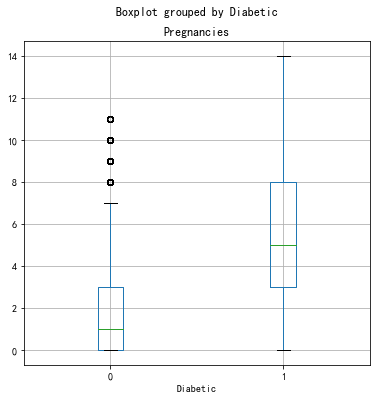

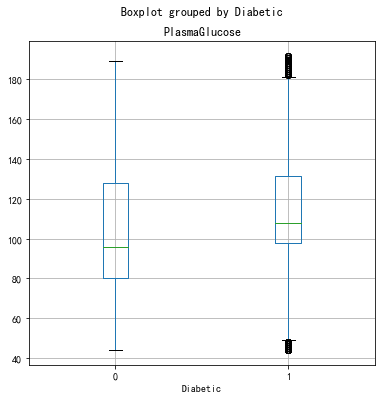

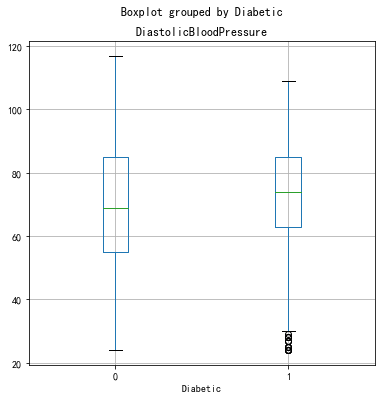

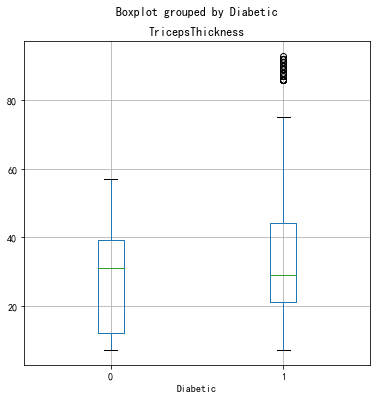

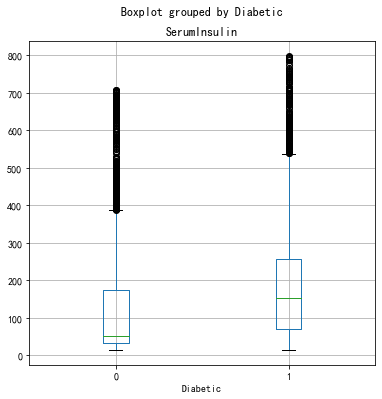

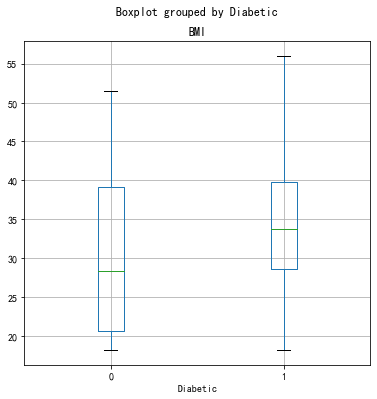

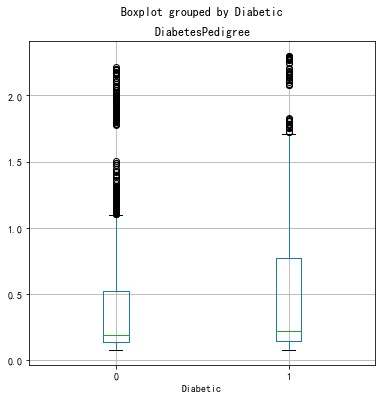

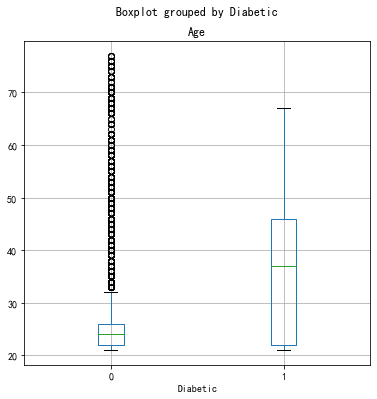

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

# 使用黑体
plt.rcParams['font.family'] = ['SimHei']

features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
for col in features:
    diabetes.boxplot(column=col, by='Diabetic', figsize=(6,6))
    plt.title(col)
plt.show()

For some of the features, there's a noticeable difference in the distribution for each label value. In particular, **Pregnancies** and **Age** show markedly different distributions for diabetic patients than for non-diabetic patients. These features may help predict whether or not a patient is diabetic.

对于某些功能，每个标签值的分布存在明显差异。特别是，**怀孕**和**年龄**在糖尿病患者中的分布明显不同于非糖尿病患者。这些特征可能有助于预测患者是否患有糖尿病。


### 拆分数据-Split the data

Our dataset includes known values for the label, so we can use this to train a classifier so that it finds a statistical relationship between the features and the label value; but how will we know if our model is any good? How do we know it will predict correctly when we use it with new data that it wasn't trained with? Well, we can take advantage of the fact we have a large dataset with known label values, use only some of it to train the model, and hold back some to test the trained model - enabling us to compare the predicted labels with the already known labels in the test set.

我们的数据集包含标签的已知值，因此我们可以使用它来训练分类器，以便它找到特征和标签值之间的统计关系；但是我们怎么知道我们的模型是否好呢？我们如何知道，当我们将其用于未经训练的新数据时，它将正确预测？好的，我们可以利用这样一个事实，即我们有一个具有已知标签值的大型数据集，只使用其中的一部分来训练模型，保留一些来测试训练后的模型-使我们能够将预测的标签与测试集中已知的标签进行比较。

In Python, the **scikit-learn** package contains a large number of functions we can use to build a machine learning model - including a **train_test_split** function that ensures we get a statistically random split of training and test data. We'll use that to split the data into 70% for training and hold back 30% for testing.

在Python中，**scikit-learn**包包含大量函数，我们可以使用这些函数构建机器学习模型，包括**train_test_split**函数，以确保我们获得训练和测试数据的统计随机分割。我们将使用它将数据分成70%用于训练模型，保留30%用于测试模型。

In [4]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 10500
Test cases: 4500


### 训练和评估一个二分类器模型-Train and Evaluate a Binary Classification Model
OK, now we're ready to train our model by fitting the training features (**X_train**) to the training labels (**y_train**). There are various algorithms we can use to train the model. In this example, we'll use *Logistic Regression*, which (despite its name) is a well-established algorithm for classification. In addition to the training features and labels, we'll need to set a *regularization* parameter. This is used to counteract any bias in the sample, and help the model generalize well by avoiding *overfitting* the model to the training data.

现在我们准备通过将训练特征(**X_train**) 与训练标签(**y_train**) 进行匹配来训练我们的模型。我们可以使用各种算法来训练模型。在本例中，我们将使用*Logistic回归*，它是一种成熟的分类算法(尽管它是这样的名称) 。除了训练功能和标签外，我们还需要设置一个*正则化*参数。这用于抵消样本中的任何偏差，并通过避免模型与训练数据的“过度拟合”，帮助模型更好地概括。

> **Note**: Parameters for machine learning algorithms are generally referred to as *hyperparameters* (to a data scientist, *parameters* are values in the data itself - *hyperparameters* are defined externally from the data!)

>**注**：机器学习算法的参数通常称为*hyperparameters*(对于数据科学家来说，*Parameters*是数据本身的值-*hyperparameters*是从数据外部定义的！) 

In [5]:
# Train the model
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print (model)

LogisticRegression(C=100.0, solver='liblinear')


---
```python
class sklearn.linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
											intercept_scaling=1, class_weight=None, random_state=None, 
											solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, 
											warm_start=False, n_jobs=None, l1_ratio=None)
```
- [sklearn.linear_model.LogisticRegression()函数解析(最清晰的解释) _种树最好的时间是10年前，其次是现在！！！-CSDN博客](https://blog.csdn.net/TeFuirnever/article/details/100180553)

---
- `c`: 正则化系数 λ 的倒数, float 类型，默认为 1.0; 必须是正浮点型数。像 SVM 一样，越小的数值表示越强的正则化。
- `solver`: 优化算法选择参数，只有五个可选参数，即 `newton-cg`, `lbfgs`, `liblinear`, `sag`, `saga`。默认为 `liblinear`。`solver` 参数决定了我们对逻辑回归损失函数的优化方法，有四种算法可以选择，分别是：
  - `liblinear`：使用了开源的 liblinear 库实现，内部使用了坐标轴下降法来迭代优化损失函数。
  - `lbfgs`：拟牛顿法的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。
  - `newton-cg`：也是牛顿法家族的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。
  - `sag`：即随机平均梯度下降，是梯度下降法的变种，和普通梯度下降法的区别是每次迭代仅仅用一部分的样本来计算梯度，适合于样本数据多的时候。
  - `saga`：线性收敛的随机优化算法的的变重。
  - `总结`：
    - `liblinear` 适用于小数据集，而 `sag` 和 `saga` 适用于大数据集因为速度更快。
    - 对于多分类问题，只有 `newton-cg`, `sag`, `saga`和 `lbfgs` 能够处理多项损失，而 `liblinear` 受限于一对剩余(OvR)。啥意思，就是用liblinear的时候，如果是多分类问题，得先把一种类别作为一个类别，剩余的所有类别作为另外一个类别。一次类推，遍历所有类别，进行分类。
    - `newton-cg`,`sag`和 `lbfgs` 这三种优化算法时都需要损失函数的一阶或者二阶连续导数，因此不能用于没有连续导数的 L1 正则化，只能用于 L2 正则化。而 `liblinear` 和 `saga` 通吃 `L1` 正则化和 `L2` 正则化。
    - 同时，`sag` 每次仅仅使用了部分样本进行梯度迭代，所以当样本量少的时候不要选择它，而如果样本量非常大，比如大于 10 万，sag 是第一选择。但是 sag 不能用于 L1 正则化，所以当你有大量的样本，又需要 L1 正则化的话就要自己做取舍了。要么通过对样本采样来降低样本量，要么回到 L2 正则化。
    - 从上面的描述，大家可能觉得，既然 `newton-cg`, `lbfgs`和 `sag` 这么多限制，如果不是大样本，我们选择 `liblinear` 不就行了嘛！错，因为 `liblinear` 也有自己的弱点！我们知道，逻辑回归有二元逻辑回归和多元逻辑回归。对于多元逻辑回归常见的有one-vs-rest(OvR)和many-vs-many(MvM)两种。而MvM一般比OvR分类相对准确一些。郁闷的是liblinear只支持OvR，不支持MvM，这样如果我们需要相对精确的多元逻辑回归时，就不能选择liblinear了。也意味着如果我们需要相对精确的多元逻辑回归不能使用L1正则化了。

---

Now we've trained the model using the training data, we can use the test data we held back to evaluate how well it predicts. Again, **scikit-learn** can help us do this. Let's start by using the model to predict labels for our test set, and compare the predicted labels to the known labels:

现在我们已经使用训练数据对模型进行了训练，我们可以使用保留的测试数据来评估模型的预测效果。同样，**scikit learn**可以帮助我们做到这一点。让我们从使用模型预测测试集的标签开始，并将预测的标签与已知标签进行比较：

In [6]:
predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)

Predicted labels:  [0 0 0 ... 0 1 0]
Actual labels:     [0 0 1 ... 1 1 1]


The arrays of labels are too long to be displayed in the notebook output, so we can only compare a few values. Even if we printed out all of the predicted and actual labels, there are too many of them to make this a sensible way to evaluate the model. Fortunately, **scikit-learn** has a few more tricks up its sleeve, and it provides some metrics that we can use to evaluate the model.

标签数组太长，无法显示在笔记本输出中，因此我们只能比较几个值。即使我们打印出所有预测和实际的标签，也有太多的标签，无法使这成为评估模型的合理方法。幸运的是，**scikit learn**还有一些技巧，它提供了一些我们可以用来评估模型的指标。

The most obvious thing you might want to do is to check the *accuracy* of the predictions - in simple terms, what proportion of the labels did the model predict correctly?

你可能想做的最明显的事情是检查预测的“准确性”——简单来说，模型正确预测的标签比例是多少？

In [7]:
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.7893333333333333


The accuracy is returned as a decimal value - a value of 1.0 would mean that the model got 100% of the predictions right; while an accuracy of 0.0 is, well, pretty useless! 

精度以十进制值返回-值为1.0意味着模型获得了100%的正确预测；而0.0的准确度是，嗯，相当无用的！


## Summary

Here we prepared our data by splitting it into test and train datasets, and applied logistic regression - a way of applying binary labels to our data. Our model was able to predict whether patients had diabetes with what appears like reasonable accuracy. But is this good enough? In the next notebook we will look at alternatives to accuracy that can be much more useful in machine learning.

在这里，我们通过将数据拆分为测试和训练数据集来准备数据，并应用逻辑回归——一种将二进制标签应用于数据的方法。我们的模型能够以合理的准确性预测患者是否患有糖尿病。但这足够好吗？在下一本笔记本中，我们将研究在机器学习中更有用的精度替代品。

In [8]:
from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2986
           1       0.72      0.60      0.66      1514

    accuracy                           0.79      4500
   macro avg       0.77      0.74      0.75      4500
weighted avg       0.78      0.79      0.78      4500



---
- `support`: 当前行的类别在测试数据中的样本总量;
- `precision`: **精准率**：TP/(TP+FP) - 换句话说在模型预测为阳性的所有用例中，实际上有多少是阳性的？
- `recall`: **召回率**：TP/(TP+FN) - 也就是说在所有为阳性的用例中，模型识别出了其中的多少个？
- `f1-score`: $F1 = 2*精度*召回率/(精度+召回率)$
- `micro avg`: 计算所有数据下的指标值，假设全部数据 5 个样本中有 3 个预测正确，所以 micro avg 为 3/5=0.6
- `macro avg`: 每个类别评估指标未加权的平均值，比如准确率的 macro avg，(0.50+0.00+1.00)/3=0.5
- `weighted avg`: 加权平均，就是测试集中样本量大的，我认为它更重要，给他设置的权重大点；比如第一个值的计算方法，(0.50*1 + 0.0*1 + 1.0*3)/5 = 0.70
- **准确度**：(TP+TN)/(TP+TN+FP+FN) - 也就是说在所有预测中，有多少是正确的？
> - TP：被模型预测为正类的正样本
> - TN：被模型预测为负类的负样本
> - FP：被模型预测为正类的负样本
> - FN：被模型预测为负类的正样本
>
> > True, False, Positive, Negative
>
> ![在这里插入图片描述](https://img-blog.csdnimg.cn/20201121155658464.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2RvbmdqaW5rdW4=,size_16,color_FFFFFF,t_70#pic_center)

---

The classification report includes the following metrics for each class  (0 and 1)

分类报告包括每个类别(0和1) 的以下指标

> note that the header row may not line up with the values!

>请注意，标题行可能与值不一致！

* *Precision*: Of the predictions the model made for this class, what proportion were correct?    
  *精度*：在模型对这一类的预测中，有多少比例是正确的？
* *Recall*: Out of all of the instances of this class in the test dataset, how many did the model identify?   
  *召回率*：在测试数据集中该类的所有实例中，模型识别了多少？
* *F1-Score*: An average metric that takes both precision and recall into account.    
  同时考虑精确度和召回率的平均指标。
* *Support*: How many instances of this class are there in the test dataset?    
  测试数据集中有多少此类实例？


The classification report also includes averages for these metrics, including a weighted average that allows for the imbalance in the number of cases of each class.

分类报告还包括这些指标的平均值，包括加权平均值，该加权平均值允许每个类别的案例数量不平衡。

Because this is a *binary* classification problem, the ***1*** class is considered *positive* and its precision and recall are particularly interesting - these in effect answer the questions:

因为这是一个*二进制*分类问题，***1***类被认为是*正的*，其精度和召回率特别有趣-这些事实上回答了以下问题：

- Of all the patients the model predicted are diabetic, how many are actually diabetic?  
  在模型预测的所有糖尿病患者中，有多少是真正的糖尿病患者？
- Of all the patients that are actually diabetic, how many did the model identify?   
  在所有实际患有糖尿病的患者中，模型确定了多少？

You can retrieve these values on their own by using the **precision_score** and **recall_score** metrics in scikit-learn (which by default assume a binary classification model).

您可以使用scikit learn中的**精度分数**和**召回分数**指标(默认情况下采用二进制分类模型) 自行检索这些值。

In [9]:
from sklearn.metrics import precision_score, recall_score

print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

Overall Precision: 0.7242472266244057
Overall Recall: 0.6036988110964333


The precision and recall metrics are derived from four possible prediction outcomes:     
精度和召回指标源自四种可能的预测结果
* *True Positives*: The predicted label and the actual label are both 1.   
  *真阳性*：预测标签和实际标签均为1。
* *False Positives*: The predicted label is 1, but the actual label is 0.   
  *假阳性*：预测标签为1，但实际标签为0。
* *False Negatives*: The predicted label is 0, but the actual label is 1.    
  *假阴性*：预测标签为0，但实际标签为1。
* *True Negatives*: The predicted label and the actual label are both 0.    
  *真阴性*：预测标签和实际标签均为0。


These metrics are generally tabulated for the test set and shown together as a *confusion matrix*, which takes the following form:

这些度量通常为测试集的表格，并以*混淆矩阵*的形式显示，其形式如下：

<table style="border: 1px solid black;">
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;color: black;" bgcolor="lightgray">TN</td><td style="border: 1px solid black;color: black;" bgcolor="white">FP</td>
    </tr>
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;color: black;" bgcolor="white">FN</td><td style="border: 1px solid black;color: black;" bgcolor="lightgray">TP</td>
    </tr>
</table>

Note that the correct (*true*) predictions form a diagonal line from top left to bottom right - these figures should be significantly higher than the *false* predictions if the model is any good.

请注意，正确的(*true*) 预测从左上角到右下角形成一条对角线-如果模型良好，这些数字应显著高于*false*预测。

In Python, you can use the **sklearn.metrics.confusion_matrix** function to find these values for a trained classifier:

在Python中，您可以使用**sklearn.metrics.confusion\u matrix**函数为经过训练的分类器查找以下值：

In [10]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, predictions)
print (cm)

[[2638  348]
 [ 600  914]]


Until now, we've considered the predictions from the model as being either 1 or 0 class labels. Actually, things are a little more complex than that. Statistical machine learning algorithms, like logistic regression, are based on *probability*; so what actually gets predicted by a binary classifier is the probability that the label is true (**P(y)**) and the probability that the label is false (1 - **P(y)**). A threshold value of 0.5 is used to decide whether the predicted label is a 1 (*P(y) > 0.5*) or a 0 (*P(y) <= 0.5*). You can use the **predict_proba** method to see the probability pairs for each case:

到目前为止，我们一直认为模型的预测是1或0类标签。事实上，事情比这复杂一点。统计机器学习算法，如逻辑回归，基于*概率*；因此，二元分类器实际预测的是标签为真的概率(**P(y) **) 和标签为假的概率(1-**P(y) **) 。阈值0.5用于确定预测标签是1(*P(y) >0.5*) 还是0(*P(y) <=0.5*) 。您可以使用**预测\概率**方法查看每种情况的概率对：

In [13]:
y_scores = model.predict_proba(X_test)
print(y_scores)
print(type(y_scores))

[[0.81651727 0.18348273]
 [0.96298333 0.03701667]
 [0.80862083 0.19137917]
 ...
 [0.60688422 0.39311578]
 [0.10672996 0.89327004]
 [0.63865894 0.36134106]]
<class 'numpy.ndarray'>


The decision to score a prediction as a 1 or a 0 depends on the threshold to which the predicted probabilities are compared. If we were to change the threshold, it would affect the predictions; and therefore change the metrics in the confusion matrix. A common way to evaluate a classifier is to examine the *true positive rate* (which is another name for recall) and the *false positive rate* for a range of possible thresholds. These rates are then plotted against all possible thresholds to form a chart known as a *received operator characteristic (ROC) chart*, like this:

将预测评分为1或0的决定取决于预测概率与之比较的阈值。如果我们改变阈值，它将影响预测；因此，更改混淆矩阵中的度量。评估分类器的常用方法是检查*真阳性率*(召回的另一个名称) 和*假阳性率*，以确定一系列可能的阈值。然后根据所有可能的阈值绘制这些速率，形成一个称为“受试者工作特征(ROC) 图”的图表，如下所示：

[0.18348273 0.03701667 0.19137917 ... 0.39311578 0.89327004 0.36134106]


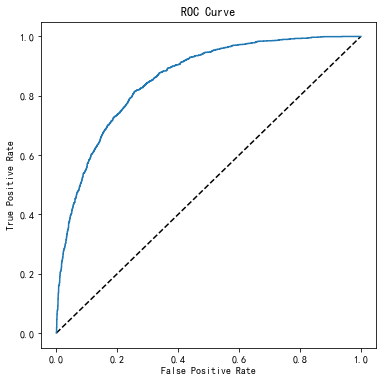

In [12]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# calculate ROC curve
print(y_scores[:,1])
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

---
- ![在这里插入图片描述](https://img-blog.csdnimg.cn/20201121155658464.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2RvbmdqaW5rdW4=,size_16,color_FFFFFF,t_70#pic_center)
-  y_scores[:,1] 就是取了预测结论的每行的第2个数据, 也即为阳性1的概率
---

The ROC chart shows the curve of the true and false positive rates for different threshold values between 0 and 1. A perfect classifier would have a curve that goes straight up the left side and straight across the top. The diagonal line across the chart represents the probability of predicting correctly with a 50/50 random prediction; so you obviously want the curve to be higher than that (or your model is no better than simply guessing!).

ROC图显示了0和1之间不同阈值的真阳性率和假阳性率曲线。一个完美的分类器应该有一条从左侧一直向上、从顶部一直向上的曲线。图表上的对角线表示50/50随机预测的正确预测概率；因此，您显然希望曲线高于此值(或者您的模型只不过是猜测而已！) 。

The area under the curve (AUC) is a value between 0 and 1 that quantifies the overall performance of the model. The closer to 1 this value is, the better the model. Once again, scikit-Learn includes a function to calculate this metric.

曲线下面积(AUC) 是一个介于0和1之间的值，用于量化模型的整体性能。该值越接近1，模型越好。scikit Learn再次包含了一个计算此度量的函数。

In [13]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.8568482508863468


### 使用 pipeline 进行预处理 - Perform preprocessing in a pipeline

In this case, the ROC curve and its AUC indicate that the model performs better than a random guess which is not bad considering we performed very little preprocessing of the data.

在这种情况下，ROC曲线及其AUC表明，该模型的性能优于随机猜测，考虑到我们对数据进行的预处理很少，这并不坏。

In practice, it's common to perform some preprocessing of the data to make it easier for the algorithm to fit a model to it. There's a huge range of preprocessing transformations you can perform to get your data ready for modeling, but we'll limit ourselves to a few common techniques:

在实践中，通常会对数据执行一些预处理，以使算法更容易将模型与之匹配。为了让数据做好建模准备，您可以执行大量的预处理转换，但我们仅限于以下几种常见技术：

- Scaling numeric features so they're on the same scale. This prevents features with large values from producing coefficients that disproportionately affect the predictions.    
  缩放数字要素，使其处于相同的比例。这可以防止具有较大值的特征产生对预测产生不成比例影响的系数。
- Encoding categorical variables. For example, by using a *one hot encoding* technique you can create individual binary (true/false) features for each possible category value.    
  对分类变量进行编码。例如，通过使用 *one hot encoding* 技术，您可以为每个可能的类别值创建单独的二进制(真/假) 特征。


To apply these preprocessing transformations, we'll make use of a Scikit-Learn feature named *pipelines*. These enable us to define a set of preprocessing steps that end with an algorithm. You can then fit the entire pipeline to the data, so that the model encapsulates all of the preprocessing steps as well as the regression algorithm. This is useful, because when we want to use the model to predict values from new data, we need to apply the same transformations (based on the same statistical distributions and category encodings used with the training data).

为了应用这些预处理转换，我们将使用名为 *pipelines* 的 Scikit 学习功能。这些使我们能够定义一组以算法结束的预处理步骤。然后，您可以将整个 pipeline 适合于数据，以便模型封装所有预处理步骤以及回归算法。这很有用，因为当我们想要使用模型从新数据预测值时，我们需要应用相同的转换(基于与训练数据一起使用的相同统计分布和类别编码) 。

>**Note**: The term *pipeline* is used extensively in machine learning, often to mean very different things! In this context, we're using it to refer to pipeline objects in Scikit-Learn, but you may see it used elsewhere to mean something else.

>**注**：术语 *pipeline* 在机器学习中广泛使用，通常意味着非常不同的事情！在本文中，我们使用它来引用 Scikit Learn 中的 *pipeline* 对象，但您可能会看到它在其他地方被用来表示其他内容。


In [14]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define preprocessing for numeric columns (normalize them so they're on the same scale)
numeric_features = [0,1,2,3,4,5,6]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode the Age column)
categorical_features = [7]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', LogisticRegression(C=1/reg, solver="liblinear"))])


# fit the pipeline to train a logistic regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor',
                 LogisticRegression(C=100.0, solver='liblinear'))])


The pipeline encapsulates the preprocessing steps as well as model training.

管道封装了预处理步骤和模型训练。

Let's use the model trained by this pipeline to predict labels for our test set, and compare the performance metrics with the basic model we created previously.

让我们使用此管道训练的模型来预测测试集的标签，并将性能指标与之前创建的基本模型进行比较。

Confusion Matrix:
 [[2667  319]
 [ 406 1108]] 

Accuracy: 0.8388888888888889
Overall Precision: 0.7764540995094604
Overall Recall: 0.7318361955085865
AUC: 0.9202444963329531


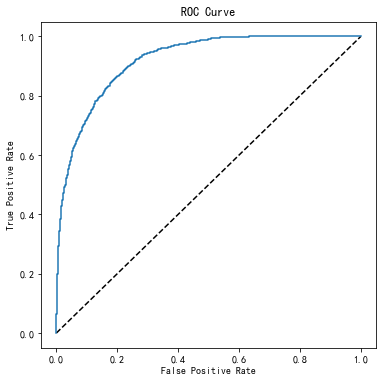

In [15]:
# Get predictions from test data
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)

# Get evaluation metrics
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()



The results look a little better, so clearly preprocessing the data has made a difference.

结果看起来稍微好一点，所以显然预处理数据起了作用。

### Try a different algorithm

Now let's try a different algorithm. Previously we used a logistic regression algorithm, which is a *linear* algorithm. There are many kinds of classification algorithm we could try, including:

现在让我们尝试一种不同的算法。之前我们使用了逻辑回归算法，这是一种 *线性* 算法。我们可以尝试多种分类算法，包括：

- **Support Vector Machine algorithms**: Algorithms that define a *hyperplane* that separates classes.    
  **支持向量机算法**：定义分离类的 *超平面* 的算法。
- **Tree-based algorithms**: Algorithms that build a decision tree to reach a prediction         
  **基于树的算法**：构建决策树以实现预测的算法
- **Ensemble algorithms**: Algorithms that combine the outputs of multiple base algorithms to improve generalizability.    
  **集成算法**：结合多个基本算法的输出以提高通用性的算法。


This time, We'll use the same preprocessing steps as before, but we'll train the model using an *ensemble* algorithm named *Random Forest* that combines the outputs of multiple random decision trees (for more details, see the [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees)).

这一次，我们将使用与之前相同的预处理步骤，但我们将使用名为*Random Forest*的*集成*算法来训练模型，该算法结合了多个随机决策树的输出(有关更多详细信息，请参阅 [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees)。

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', RandomForestClassifier(n_estimators=100))])

# fit the pipeline to train a random forest model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor', RandomForestClassifier())])


Let's look at the performance metrics for the new model.

Confusion Matrix:
 [[2855  131]
 [ 184 1330]] 

Accuracy: 0.93
Overall Precision: 0.9103353867214237
Overall Recall: 0.8784676354029062

AUC: 0.9822680877118317


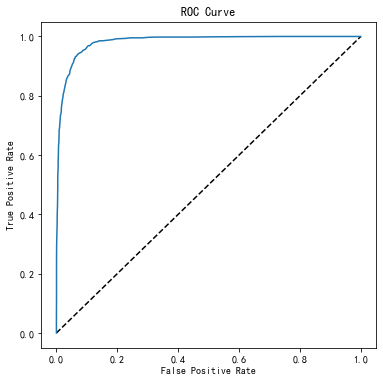

In [17]:
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

That looks better!

看起来好多了！

### Use the Model for Inferencing
Now that we have a reasonably useful trained model, we can save it for use later to predict labels for new data:

现在我们有了一个相当有用的经过训练的模型，我们可以将其保存起来，以便以后用于预测新数据的标签：

In [18]:
import joblib

# Save the model as a pickle file
filename = './diabetes_model.pkl'
joblib.dump(model, filename)

['./diabetes_model.pkl']

When we have some new observations for which the label is unknown, we can load the model and use it to predict values for the unknown label:

当我们有一些标签未知的新观察时，我们可以加载模型并使用它来预测未知标签的值：

In [19]:
# Load the model from the file
model = joblib.load(filename)

# predict on a new sample
# The model accepts an array of feature arrays (so you can predict the classes of multiple patients in a single call)
# We'll create an array with a single array of features, representing one patient
X_new = np.array([[2,180,74,24,21,23.9091702,1.488172308,22]])
print ('New sample: {}'.format(list(X_new[0])))

# Get a prediction
pred = model.predict(X_new)

# The model returns an array of predictions - one for each set of features submitted
# In our case, we only submitted one patient, so our prediction is the first one in the resulting array.
print('Predicted class is {}'.format(pred[0]))

New sample: [2.0, 180.0, 74.0, 24.0, 21.0, 23.9091702, 1.488172308, 22.0]
Predicted class is 1


## Summary

In this notebook, we looked at the basics of binary classification. We will move onto more complex classification problems in the following notebook.

在本笔记本中，我们了解了二进制分类的基础知识。我们将在下面的笔记本中讨论更复杂的分类问题。